# MIT-BIH database download and visualization

## Download the database

In [ ]:
import os
import numpy as np
import pandas as pd
import wfdb
from matplotlib import pyplot as plt
%matplotlib inline

wfdb.dl_database('mitdb', os.path.join(os.getcwd(), 'mitdb'))

## Visualize the database
Using WFDB package. https://github.com/MIT-LCP/wfdb-python

#### Below is a normal record

In [4]:
records = wfdb.get_record_list('mitdb')

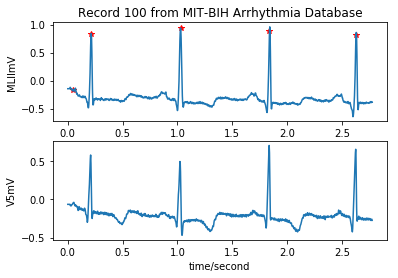

In [5]:
# some parameters
file_name = '100'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

record = wfdb.rdrecord('data/' + file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 
annotation = wfdb.rdann('data/' + file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

#### Below is a abnormal record

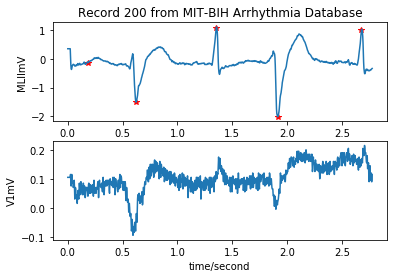

In [6]:
# some parameters
file_name = '200'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

record = wfdb.rdrecord('data/' + file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 
annotation = wfdb.rdann('data/' + file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

## Some statistics on the data

In [7]:
records = wfdb.get_record_list('mitdb')

Let's looks at what are the signals names for all the subjects.

In [8]:
sig_names = pd.DataFrame()

for record in records:
    signal, field = wfdb.rdsamp('data/' + record)
    sig_names[record] = pd.Series(field['sig_name'], index = ['Channel 1', 'Channel 2'])
    
pd.options.display.max_columns = 999   
sig_names

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
Channel 1,MLII,MLII,V5,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII
Channel 2,V5,V1,V2,V2,V2,V1,V1,V1,V1,V1,V1,V1,V1,MLII,V1,V1,V2,V1,V1,V1,V1,V5,V4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1


In [9]:
sig_names.T.apply(pd.value_counts)

,Channel 1,Channel 2
MLII,45.0,1
V1,NaN,40
V2,NaN,4
V4,NaN,1
V5,3.0,2


Result: most of them are 'MLII' or 'V1', only a few are 'V2' - 'V5'

Then let's look at the annotation symbols for all the subjects.

In [10]:
ann_symbols = pd.DataFrame()

for record in records:
    ann = wfdb.rdann('data/' + record, 'atr')
    ann_symbols[record] = pd.Series(ann.symbol)

Beat counts by subject and beat type

In [12]:
ann_counts = ann_symbols.apply(pd.value_counts) 
ann_counts

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,427.0,NaN,NaN,NaN
+,1.0,1.0,5.0,1.0,45.0,1.0,41.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,103.0,1.0,1.0,1.0,13.0,111.0,35.0,8.0,37.0,13.0,23.0,35.0,13.0,15.0,1.0,37.0,23.0,3.0,67.0,21.0,17.0,23.0,128.0,23.0,41.0,201.0,11.0,1.0,53.0,3.0
/,NaN,NaN,2028.0,NaN,1353.0,NaN,NaN,2078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,33.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,10.0,NaN,1.0,1.0,92.0,NaN,1.0,NaN,NaN,2.0,16.0,30.0,36.0,NaN,3.0,NaN,NaN,317.0,NaN,NaN,20.0,NaN,3.0,NaN,7.0,94.0,NaN,206.0,61.0,3.0,NaN,1.0,1382.0,6.0,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0,NaN,11.0,NaN,316.0,NaN,9.0,NaN,271.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,10.0,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2237.0,2123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.0,NaN,NaN,NaN,NaN,NaN,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,2239.0,1860.0,99.0,2082.0,163.0,2135.0,1507.0,NaN,1739.0,NaN,NaN,2261.0,1789.0,1820.0,1953.0,2156.0,1534.0,NaN,1543.0,1861.0,2271.0,1515.0,NaN,1416.0,1625.0,2061.0,1821.0,2178.0,NaN,1145.0,1923.0,2063.0,633.0,1790.0,NaN,2147.0,244.0,2046.0,1954.0,1849.0,1712.0,1757.0,1688.0,2070.0,314.0,NaN,1625.0,2211.0


Total counts of different type of beats among all subjects

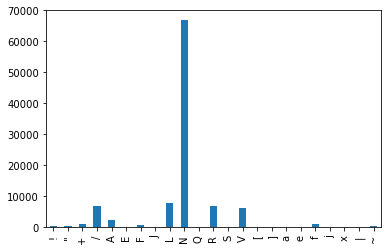

In [213]:
ann_counts.sum(axis=1).plot(kind = 'bar')

In [238]:
ann.sample[:10]

array([  52,  135,  366,  606,  841, 1082, 1327, 1562, 1794, 2042])

## Segment the signal and visualize a few types of beats.

In [ ]:
beat_len = 200
beats_data = {'N': np.empty([0,200]), 'L': np.empty([0,200]), 'R': np.empty([0,200]),
              'V': np.empty([0,200]), '/': np.empty([0,200])}
labels = ['N', 'L', 'R', 'V', '/']

for record in records: 
    
    signal, field = wfdb.rdsamp('data/' + record)
    signal0 = signal[:,0]  # get signal from channel 0 only
    #signal0 = (signal0 - np.mean(signal0)) / np.std(signal0) # scale the signal
    ann = wfdb.rdann('data/' + record, 'atr')
    ann_pos = ann.sample
    ann_sym = ann.symbol
    
    for beat_num in range(100): # for speed, only choose the first 100 annotations
        
        beat_type = ann_sym[beat_num]
        beat_pos = ann_pos[beat_num]
        
        if beat_type in labels:
            if beat_len/2 < beat_pos < (len(signal0) - beat_len/2):
                beat = signal0[ann_pos[beat_num] - int(beat_len/2) : ann_pos[beat_num] + int(beat_len/2)]
                beats_data[beat_type] = np.append(beats_data[beat_type], beat.reshape(1,200), axis = 0)

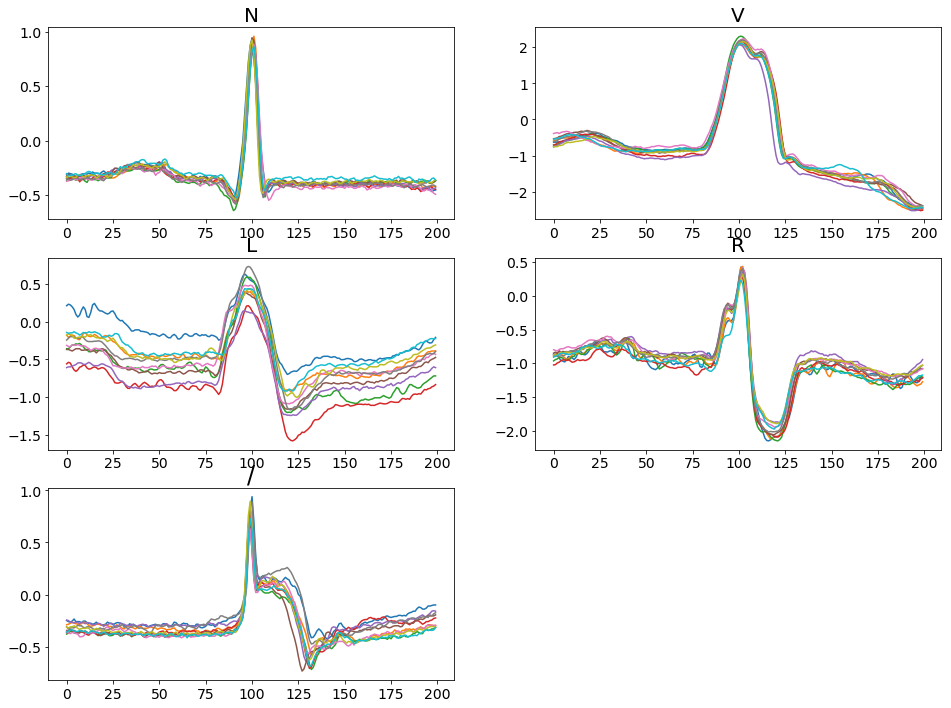

In [37]:
plt.figure(figsize=(16, 12))
plt.rc('font', size = 14)
plt.subplot(3,2,1)
for beat_num in range(10):
    plt.plot(beats_data['N'][beat_num,:])
    plt.title('N', fontsize = 20)
plt.subplot(3,2,2)
for beat_num in range(20,30):
    plt.plot(beats_data['V'][beat_num,:])
    plt.title('V', fontsize = 20)
plt.subplot(3,2,3)
for beat_num in range(10):
    plt.plot(beats_data['L'][beat_num,:])
    plt.title('L', fontsize = 20)
plt.subplot(3,2,4)
for beat_num in range(10):
    plt.plot(beats_data['R'][beat_num,:])
    plt.title('R', fontsize = 20)
plt.subplot(3,2,5)
for beat_num in range(10,20):
    plt.plot(beats_data['/'][beat_num,:])
    plt.title('/', fontsize = 24)

## Heart rate statistics

In [7]:
from wfdb import processing

print('record'+'\t'+'max'+'\t'+'min'+'\t'+'mean'+'\t'+'std')
for record in records:
    ann = wfdb.rdann('data/'+record, 'atr')
    qrs_inds = ann.sample
    heart_rate=processing.compute_hr(650000, qrs_inds, 360)[1000:]
    print(record+'\t'+str(np.nanmax(heart_rate))+'\t'+str(np.nanmin(heart_rate))
          +'\t'+str(np.nanmean(heart_rate))+'\t'+str(np.nanstd(heart_rate)))

record	max	min	mean	std
100	114.894	53.0713	75.79	5.29636
101	900.0	47.0588	63.0573	22.6708
102	152.113	61.5385	72.9586	4.92954
103	332.308	53.7313	69.7087	9.06678
104	2700.0	63.9053	79.9474	48.7709
105	900.0	51.3064	96.1593	52.0712
106	354.098	39.9261	81.5925	34.41
107	1028.57	63.5294	71.6243	20.8799
108	1440.0	35.0649	65.5125	51.8675
109	207.692	65.2568	84.4037	5.73046
111	400.0	58.5366	71.203	9.70834
112	423.529	62.2478	85.1488	12.6711
113	127.059	43.2866	60.0078	6.8517
114	288.0	35.8209	64.0898	13.5474
115	3600.0	45.8599	68.0196	86.8075
116	360.0	55.3846	82.266	14.8714
117	171.429	46.5517	51.1724	4.48215
118	480.0	44.7205	78.5534	21.137
119	263.415	40.7547	83.6585	39.2835
121	553.846	41.1429	62.935	17.0697
122	526.829	65.6535	82.4749	9.25714
123	114.894	39.4161	50.6617	5.61591
124	234.783	37.9613	55.1475	12.9793
200	1800.0	45.3782	103.469	44.959
201	360.0	17.9551	80.2778	44.2241
202	502.326	36.6102	74.5644	31.7314
203	1270.59	36.4865	117.614	63.7931
205	830.769	53.4653	90.4711	28.7